In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from ridge import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')
sns.set_color_codes()

In [157]:
np.random.seed(0)
m = 100
u = np.random.randn(m)
u /= np.linalg.norm(u)
def f(x):
    return np.abs(np.dot(u, x)) + 0.1*(np.sin(1000*x[1])+1)

X = np.random.uniform(-1,1,size = (int(1e3),m))
fX = np.array([f(x) for x in X])

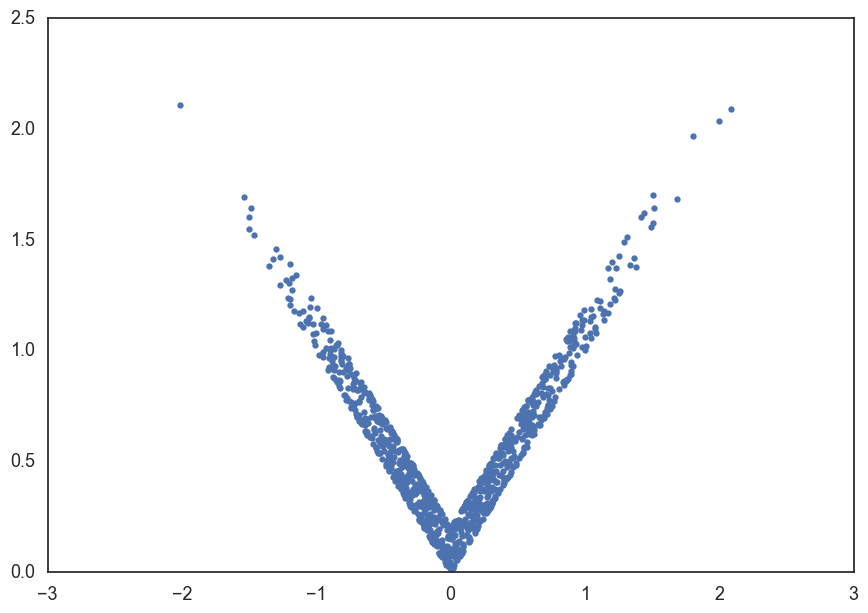

In [158]:
fig, ax = plt.subplots()
ax.plot(np.dot(u.T, X.T).T, fX,'.')

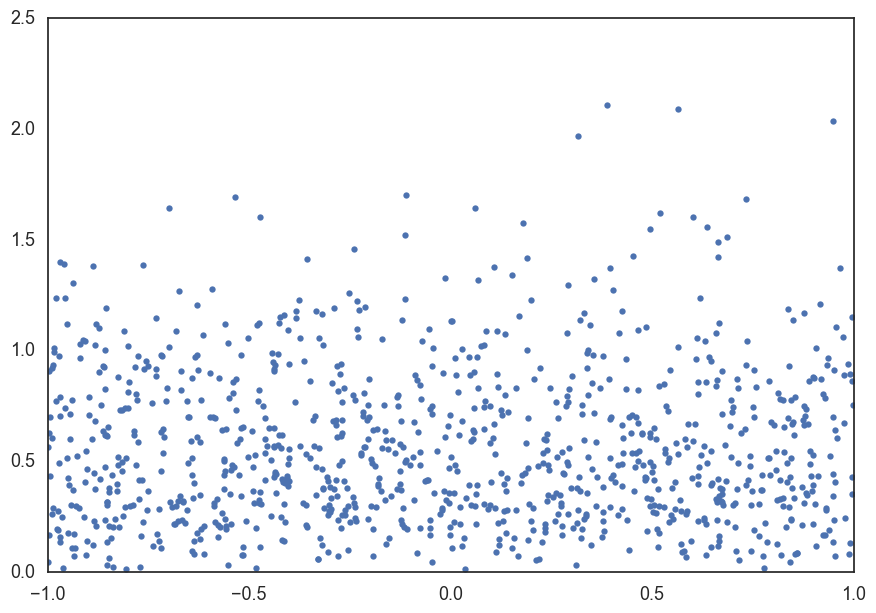

In [159]:
fig, ax = plt.subplots()
ax.plot(X[:,0], fX,'.')

In [160]:
pra = PolynomialRidgeApproximation(degree = 7, subspace_dimension = 1, n_init = 50)
pra.fit(X, fX)

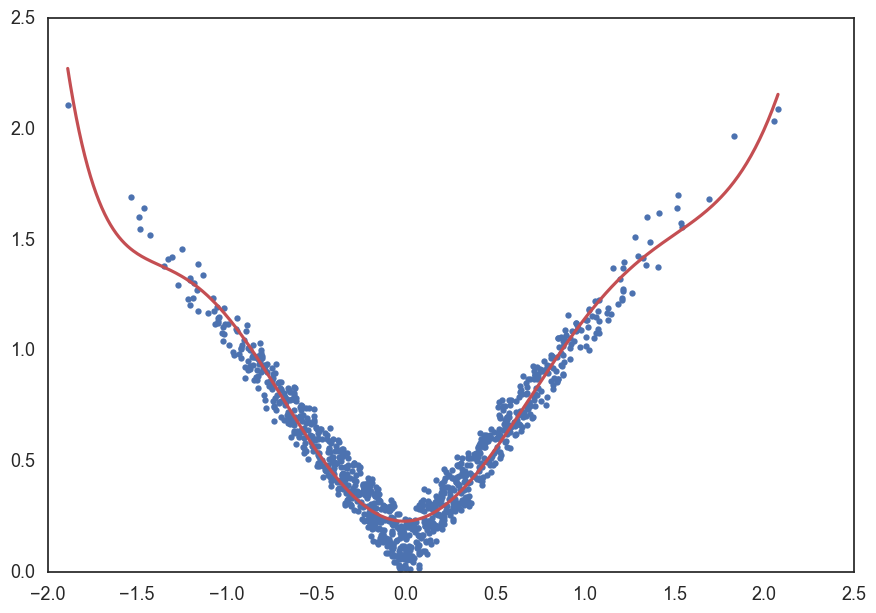

In [161]:
fig, ax = plt.subplots()
UX = np.dot(pra.U.T, X.T).T.flatten()

ax.plot(UX, fX,'.')
I = np.argsort(UX).flatten()
XX = np.array([  (X[I[-1]] - X[I[0]]) * h + X[I[0]] for h in np.linspace(0,1, 500)])
UXX = np.dot(pra.U.T, XX.T).T.flatten()
ax.plot(UXX, pra.predict(XX), 'r-')

In [165]:
from pgf import PGF
pgf = PGF()
pgf.add('UX', UXX)
pgf.add('fit',pra.predict(XX))
pgf.write('fig_example_fit.dat')

pgf = PGF()
pgf.add('UX', UX)
pgf.add('X1', X[:,0])
pgf.add('f', fX)
pgf.write('fig_example.dat')

pgf = PGF()
pgf.add('i', np.arange(1,101))
pgf.add('U', u)
pgf.add('U_fit', pra.U.flatten())
pgf.write('fig_example_U.dat')

In [164]:
u.shape

(100,)

In [169]:
np.max(pra.U)

0.23584521311230464